In [2]:
import pandas as pd

In [3]:
weather_df = pd.read_csv("1938479.csv")
mosq_df = pd.read_csv("db/mosquito_data.csv")

In [28]:
mosq_df["TEST DATE"] = mosq_df["TEST DATE"].str.split("T", expand=True)[0]
mosq_df = mosq_df.sort_values("TEST DATE")

In [34]:
weather_df["PRCP_Avg"] = weather_df["PRCP"].rolling(7).mean()

In [51]:
weather_df["TAVG"] = weather_df["TAVG"].fillna((weather_df.TMAX + weather_df.TMIN) / 2)
weather_df["TAVG_Avg"] = weather_df["TAVG"].rolling(7).mean()

In [57]:
weather_df.set_index("DATE", inplace=True)
mosq_df.set_index("TEST DATE", inplace=True)

In [59]:
joined_df = mosq_df.join(weather_df)
joined_df.to_csv("joined.csv")

In [5]:
year = []
month = []
day = []

for date in df["DATE"]:
    x = date.split("-")
    year.append(x[0])
    month.append(x[1])
    day.append(x[2])

In [6]:
df["Year"] = year
df["Month"] = month
df["Day"] = day

In [8]:
df[df["Month"] == "06|07"]

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESD,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,Year,Month,Day


In [21]:
df["Month"] = df["Month"].astype(int)

In [9]:
df[(df.Month == "06") | (df.Month == "07") | (df.Month == "08") | (df.Month == "09")]

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WESD,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,Year,Month,Day
151,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2007-06-01,0.19,0.0,0.0,NaN,85,62,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2007,06,01
152,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2007-06-02,0.04,0.0,0.0,NaN,81,65,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2007,06,02
153,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2007-06-03,0.01,0.0,0.0,NaN,78,62,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2007,06,03
154,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2007-06-04,0.39,0.0,0.0,NaN,71,58,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2007,06,04
155,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2007-06-05,0.42,0.0,0.0,NaN,64,47,0.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2007,06,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2019-09-26,0.00,0.0,0.0,65.0,72,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,09,26
4652,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2019-09-27,2.28,0.0,0.0,63.0,69,58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,09,27
4653,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2019-09-28,0.19,0.0,0.0,61.0,66,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,09,28
4654,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",2019-09-29,0.57,0.0,0.0,61.0,66,60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,09,29


In [16]:
df = pd.read_csv("joined.csv")
airport = df[(df.BLOCK == "100XX W OHARE AIRPORT")]

In [5]:
from matplotlib import pyplot as plt

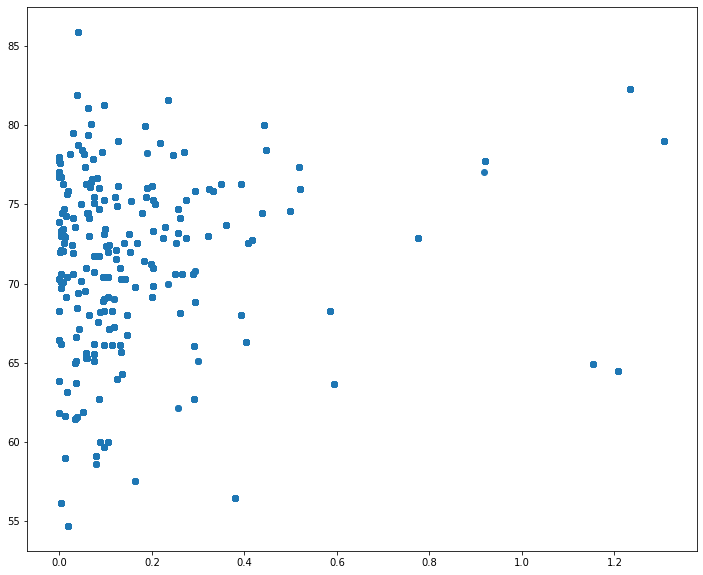

In [22]:
plt.figure(figsize=(12,10))
plt.scatter(x=airport.PRCP_Avg, y=airport.TAVG_Avg)

In [21]:
airport.PRCP_Avg.corr(airport.TAVG_Avg)

0.15735825817671317

In [31]:
df.groupby("SEASON YEAR").sum()["NUMBER OF MOSQUITOES"]

SEASON YEAR
2007    57708
2008    24034
2009    21108
2010    21885
2011    18799
2012    36021
2013    36444
2014    37500
2015    16997
2016    36711
2017    14236
2018    17980
2019    24721
Name: NUMBER OF MOSQUITOES, dtype: int64

In [32]:
df.groupby("SEASON YEAR").count()["NUMBER OF MOSQUITOES"]

SEASON YEAR
2007    3736
2008    2096
2009    2249
2010    2389
2011    2054
2012    2478
2013    2392
2014    2730
2015    1751
2016    2029
2017    1577
2018    1715
2019    2293
Name: NUMBER OF MOSQUITOES, dtype: int64

In [33]:
df_counts = pd.DataFrame()

In [38]:
df_counts["Number of Mosquitos"] = df.groupby("SEASON YEAR").sum()["NUMBER OF MOSQUITOES"]
df_counts["Traps Tested"] = df.groupby("SEASON YEAR").count()["NUMBER OF MOSQUITOES"]
df_counts["Mosquitos per Trap"] = df_counts["Number of Mosquitos"] / df_counts["Traps Tested"]

In [39]:
df_counts

,Number of Mosquitos,Traps Tested,Mosquitos per Trap
SEASON YEAR,,,
2007,57708,3736,15.446467
2008,24034,2096,11.466603
2009,21108,2249,9.385505
2010,21885,2389,9.160737
2011,18799,2054,9.152386
2012,36021,2478,14.536320
2013,36444,2392,15.235786
2014,37500,2730,13.736264
2015,16997,1751,9.707025


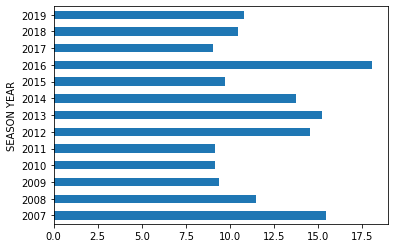

In [43]:
df_counts["Mosquitos per Trap"].plot(kind="barh")

In [44]:
airport

,Unnamed: 0,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,NUMBER OF MOSQUITOES,RESULT,SPECIES,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,PRCP_Avg,TAVG_Avg
3906,2008-06-24,2008,25,24273,100XX W OHARE AIRPORT,T907,CDC,19,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037143,68.428571
3909,2008-06-24,2008,25,24276,100XX W OHARE AIRPORT,T900,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037143,68.428571
3928,2008-06-24,2008,25,24275,100XX W OHARE AIRPORT,T907,CDC,3,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037143,68.428571
3937,2008-06-24,2008,25,24280,100XX W OHARE AIRPORT,T906,GRAVID,4,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037143,68.428571
3940,2008-06-24,2008,25,24278,100XX W OHARE AIRPORT,T901,GRAVID,4,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.037143,68.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29368,2019-09-19,2019,38,49792,100XX W OHARE AIRPORT,T912,GRAVID,1,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264286,70.571429
29369,2019-09-19,2019,38,49790,100XX W OHARE AIRPORT,T905,GRAVID,1,negative,CULEX TARSALIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264286,70.571429
29389,2019-09-26,2019,39,49917,100XX W OHARE AIRPORT,T910,GRAVID,2,negative,CULEX RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234286,70.000000
29399,2019-09-26,2019,39,49915,100XX W OHARE AIRPORT,T912,GRAVID,5,negative,CULEX PIPIENS/RESTUANS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.234286,70.000000
